In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# School Fire Cases in Sweden and KPIs
## What KPIs effect most the number of school fire cases and could we predict a school fire

*Author: Sashka Ignatova, Software University, Sofia, ignatovasashka@gmail.com*

#### Abstract
Sweden has a surprisingly large number of school fires for a small country (< 10M inhabitants), and many of these fires are due to arson. For instance, according to the Division of Fire Safety Engineering at Lund University, "Almost every day between one and two school fires occur in Sweden. In most cases arson is the cause of the fire." The associated costs can be up to a billion SEK (around 120 million USD) per year.

It is hard to say why these fires are so common in Sweden compared to other countries, and this dataset doesn't address that question - but could it be possible, within a Swedish context, to find out which properties and indicators of Swedish towns (municipalities, to be exact) might be related to a high frequency of school fires?


#### Key words 
school, fire, KPI

#### 1. Introduction



#### 2. Research Questions and Hypothesis


#### 2. Data and Privacy
Data is collected by [Mikael Huss](https://twitter.com/mikaelhuss) and published to [Kaggle](https://www.kaggle.com/mikaelhuss/swedish-school-fires) and indicates the school fires reported in Swedish municipalities over last few years. This is coupled with some predictors for the towns over the same years, with aim to see if some predictors associate with an increase in school fires.

Data on school fire cases in Sweden between 1998 and 2014 is collected through a web site with official statistics from the Swedish Civil Contingencies Agency (https://ida.msb.se/ida2#page=a0087). At least at the time when the data was collected, there was no API to allow easy access to schools fire data, so a quasi-manual process is used, downloading XLSX report generated from the database year by year, after which joined these with an R script into a single table of school fire cases where the suspected reason was arson. (Full details on the data acquisition process are available.)

The number of such cases is reported for each municipality (of which there are currently 290) and year (i e each row is a unique municipality/year combination). The population at the time is also reported.

KPIs were extracted from [Kolada](https://www.kolada.se/) (a database of Swedish municipality and county council statistics) by repeatedly querying its API (https://github.com/Hypergene/kolada).

Data about simplified municipality KPIs is provided by [Jens Finnäs](https://github.com/jensfinnas) here: https://github.com/jensfinnas/Election-night-at-Aftonbladet

* code: Administrative code of the municipality
* name: Name of the municipality
* medianIncome: Disposable median net income persons 20 years and older. Net income is the sum of all taxable and tax-free income such as earned and capital income and transfers minus tax and other negative transfers. Income is calculated per individual. Income directed to the whole household, such as financial assistance and housing support, has, where applicable, been divided among the adults in the household, mean for the period 2010-2013, SEK
* youthUnemployment2010, youthUnemployment2013: Number of residents 16-24 years who are openly unemployed or in programs with activity support, divided by number of residents 16-24 years, %
* unemployment2010, unemployment2013: Number of residents 18-64 years who are openly unemployed or in programs with activity support divided by number of residents 18-64 years, %
* unemploymentChange: Change in unemployment percents 2013 - 2010
* reportedCrime: Number of reported crimes per 100 000 inhabitants
* populationChange: Population change 2013 - 2010, %
* hasEducation: Residents with post-secondary education 25-64 years, %. Post-secondary education refers to: post-secondary education shorter than 3 years, longer than 3 years and postgraduate education
* asylumCosts: Asylum costs, SEK
* urbanDegree: Percentage (%) of the population living in urban areas. A collection of houses with at least 200 inhabitants is counted as an urban area
* satisfactionInfluence	satisfactionGeneral	satisfactionElderlyCare 
* foreignBorn: Foreign-born aged 18-64 in the municipality, %
* reportedCrimeVandalism: The crime category crime of vandalism includes "damage / gross damage / damage to motor vehicle (not fire), through fire (including motor vehicle), graffiti, against state, municipality, region (not graffiti), other vandalism" and "arson / aggravated arson", number per 1 000 inhabitants
* youngUnskilled: Young unskilled, % 
* latitude
* longitude
* population: population, number
* populationShare65plus: People 65 years old and above, %
* municipalityType
* municipalityTypeBroad
* refugees: The foreign citizens who have been granted a residence permit in Sweden as refugees, in need of protection, according to extremely painful circumstances or as relatives, %
* rentalApartments: Average area for rented premises, sqm
* governing: Type of governing
* fokusRanking: Refers to results for students in municipal schools located in the municipality. The reported result is the municipality's position among the country's 290 municipalities(low values show good results)
* foretagsklimatRanking: Municipal ranking (1-290) of the entrepreneurs' summary assessment of the business climate in the municipality. What is reported is the ranking according to the question "what summary assessment do you want to give your municipality?" in the questionnaire part of the Confederation of Swedish Enterprise's survey where entrepreneurs are asked about their views on the municipality's ability to create a good business climate
* cars
* motorcycles
* tractors	
* snowmobiles

#### 3. Related Research

http://www.nxn.se/valent/2016/9/6/wioi51hctmmjheez5s0fsvygfiiois

https://ida.msb.se/ida2#page=c2a7aea1-1ca6-43c2-9fb1-84f1bf0b5e6e

https://www.kolada.se/verktyg/fri-sokning/

http://www.rka.nu/

https://books.google.bg/books?id=DvCR-sIH56UC&pg=PA57&lpg=PA57&dq=bjurholm+refugees&source=bl&ots=iETTc-Imt3&sig=ACfU3U1DBzD70LwxS-aQk6xIFKIpbWQMdw&hl=bg&sa=X&ved=2ahUKEwja05vLwLzsAhVs8OAKHWCcACgQ6AEwCHoECAUQAg#v=onepage&q=bjurholm%20refugees&f=false

#### 4. Reading Data and Data Cleaning

Data is read from the following files `school_fire_cases_1998_2014.csv` and `simplified_municipality_indicators.csv`.

In [3]:
fires = pd.read_csv("data/school_fire_cases_1998_2014.csv")
fires

,Municipality,Cases,Population,Year
0,Ale,0,25292,1998
1,Alingsås,0,34930,1998
2,Alvesta,0,19171,1998
3,Aneby,0,6806,1998
4,Arboga,0,14070,1998
...,...,...,...,...
4919,Österåker,0,41180,2014
4920,Östhammar,0,21374,2014
4921,Östra Göinge,0,13864,2014
4922,Överkalix,0,3409,2014


In [4]:
indicators = pd.read_csv("data/simplified_municipality_indicators.csv")
indicators

,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,unemployment2013,unemploymentChange,reportedCrime,populationChange,...,municipalityTypeBroad,refugees,rentalApartments,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles
0,780,Växjö,201793,9.3,8.7,7.9,8.0,0.1,831,0.8,...,Town,33.8,234.1,Conservative,19,24,3651.694532,200.542250,260.370538,4.609128
1,1487,Vänersborg,195999,13.7,13.2,9.5,9.4,-0.1,641,2.7,...,Rural,14.4,164.8,Mixed,80,231,2230.455552,138.180123,226.960270,8.155657
2,1765,Årjäng,182826,6.4,5.5,7.2,5.3,-1.9,575,-3.5,...,Rural,11.2,129.1,Conservative,204,113,765.670911,46.767875,183.031342,11.263467
3,1293,Hässleholm,237817,10.4,13.1,9.1,9.6,0.5,751,3.9,...,Town,13.2,136.9,Conservative,83,187,1311.598558,103.215144,181.189904,0.951522
4,2403,Bjurholm,168796,7.1,11.5,6.7,10.2,3.5,205,-3.2,...,Rural,52.0,87.6,Conservative,266,38,565.270936,38.177340,176.518883,186.781609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,180,Stockholm,234360,3.8,4.2,5.3,5.4,0.1,1776,10.8,...,City,15.9,223.0,Conservative,1,22,359.089896,13.233820,2.625599,1.910438
286,126,Huddinge,222313,4.2,4.6,5.9,5.9,0.0,1319,8.9,...,City,17.3,130.7,Conservative,9,103,347.874840,22.290044,2.593680,2.691186
287,123,Järfälla,227460,3.8,5.0,5.6,6.9,1.3,1105,7.5,...,City,18.7,110.8,Conservative,10,59,379.805399,19.517978,2.515651,3.021672
288,138,Tyresö,239204,3.5,5.3,3.7,4.4,0.7,942,4.6,...,City,5.5,88.5,Conservative,35,43,370.971749,28.251395,2.506718,3.839118


In [5]:
#fires[fires["Municipality"] == "Hässleholm"]

In [6]:
indicators.columns

Index(['code', 'name', 'medianIncome', 'youthUnemployment2010',
       'youthUnemployment2013', 'unemployment2010', 'unemployment2013',
       'unemploymentChange', 'reportedCrime', 'populationChange',
       'hasEducation', 'asylumCosts', 'urbanDegree', 'satisfactionInfluence',
       'satisfactionGeneral', 'satisfactionElderlyCare', 'foreignBorn',
       'reportedCrimeVandalism', 'youngUnskilled', 'latitude', 'longitude',
       'population', 'populationShare65plus', 'municipalityType',
       'municipalityTypeBroad', 'refugees', 'rentalApartments', 'governing',
       'fokusRanking', 'foretagsklimatRanking', 'cars', 'motorcycles',
       'tractors', 'snowmobiles'],
      dtype='object')

In [7]:
indicators.dtypes

code                         int64
name                        object
medianIncome                 int64
youthUnemployment2010      float64
youthUnemployment2013      float64
unemployment2010           float64
unemployment2013           float64
unemploymentChange         float64
reportedCrime                int64
populationChange           float64
hasEducation               float64
asylumCosts                  int64
urbanDegree                float64
satisfactionInfluence       object
satisfactionGeneral         object
satisfactionElderlyCare     object
foreignBorn                float64
reportedCrimeVandalism     float64
youngUnskilled             float64
latitude                   float64
longitude                  float64
population                   int64
populationShare65plus      float64
municipalityType            object
municipalityTypeBroad       object
refugees                   float64
rentalApartments           float64
governing                   object
fokusRanking        

In [8]:
fires.dtypes

Municipality    object
Cases            int64
Population       int64
Year             int64
dtype: object

Surprisingly I found some mismatch in the `Population` column of the two files. Below are described the municipalities with mismatch. 

In [9]:
only_2013 = fires[fires["Year"] == 2013]
only_2013 = only_2013.sort_values(by = ["Municipality"])
only_2013 = only_2013.reset_index()
only_2013

,index,Municipality,Cases,Population,Year
0,4344,Ale,1,28074,2013
1,4345,Alingsås,0,38619,2013
2,4346,Alvesta,1,19280,2013
3,4347,Aneby,0,6375,2013
4,4348,Arboga,0,13493,2013
...,...,...,...,...,...
285,4629,Österåker,0,40495,2013
286,4630,Östhammar,0,21352,2013
287,4631,Östra Göinge,0,13687,2013
288,4632,Överkalix,0,3436,2013


In [10]:
indicators = indicators.sort_values(by = ["name"])
indicators = indicators.reset_index()

In [11]:
only_2013["Population"].equals(indicators["population"])

False

In [12]:
difference = only_2013.Population - indicators.population

In [13]:
compare_table = only_2013.loc[difference.to_numpy().nonzero()]
compare_table["indicator_population"] = indicators.iloc[difference.to_numpy().nonzero()].population

Let's check only columns with population and drop other columns:

In [14]:
compare_table.drop(["index","Cases", "Year"], axis = 1)

,Municipality,Population,indicator_population
77,Hällefors,6982,10281
78,Härjedalen,10281,24509
79,Härnösand,24509,35732
80,Härryda,35732,50227
81,Hässleholm,50227,19968
82,Håbo,19968,6982
257,Vänersborg,37369,8583
258,Vännäs,8583,39784
259,Värmdö,39784,33155
260,Värnamo,33155,35867


They seem to be consecutive as being sorted by name, so I would assume it is due to a manual mistake. Comparing the data with [The Statistics Sweden Site](https://kommunsiffror.scb.se/?id1=1401&id2=null) shows that population data in `school_fire_cases_1998_2014.csv` is correct. In our communication with the author also confirmed that the correct population figures should be in the N01951 indicator. Thus I could feel free use population data for 2013 in `school_fire_cases_1998_2014.csv`. 

In [15]:
indicators.population = only_2013.Population

The analysis will be held on `indicators` file, so the data in it would be cleaned. The columns `satisfactionInfluence`, `satisfactionGeneral` and `satisfactionElderlyCare` does not represent valuable data, as there are many "NA" values. Also columns `index` and `code` would not be usefull for analytics. Columns are dropped.

In [16]:
indicators = indicators.drop(["index", "code", "satisfactionInfluence", "satisfactionGeneral", "satisfactionElderlyCare"], axis = 1)

A new column `fireCases` is added to the dataset - this is data for cases from 2010 to 2013 in the column `Cases` from `school_fire_cases_1998_2014.csv`.

In [17]:
cases_after_2010 = fires[fires["Year"] >= 2010]
cases2010to2013 = cases_after_2010[cases_after_2010["Year"] < 2014]
cases2010to2013 = cases2010to2013.drop(["Population", "Year"], axis = 1)
cases2010to2013 = cases2010to2013.groupby(["Municipality"]).sum()
cases2010to2013 = cases2010to2013.sort_values(by = ["Municipality"])
cases2010to2013 = cases2010to2013.reset_index()

In [18]:
indicators["fireCases"] = cases2010to2013["Cases"]

It would be valuable to have columns for cases in each year 2010 and 2013 as we have KPIs described for each year in the data. So column `fireCases2010` and `fireCases2013` are added. We already extracted cases in 2013 in `only_2013`. Same procedure is applied for 2010.

In [19]:
only_2010 = fires[fires["Year"] == 2010]
only_2010 = only_2010.sort_values(by = ["Municipality"])
only_2010 = only_2010.reset_index()
indicators["fireCases2010"] = only_2010["Cases"]
indicators["fireCases2013"] = only_2013["Cases"]
indicators

,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,unemployment2013,unemploymentChange,reportedCrime,populationChange,hasEducation,...,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles,fireCases,fireCases2010,fireCases2013
0,Ale,218334,8.5,7.3,6.8,5.5,-1.3,691,2.7,31.5,...,Mixed,61,61,482.296787,38.434138,29.778443,1.781007,2,0,1
1,Alingsås,206737,9.4,8.8,7.4,6.3,-1.1,862,3.7,39.2,...,Conservative,48,173,476.941402,38.452575,39.669593,1.346487,1,1,0
2,Alvesta,198482,11.7,13.1,7.9,8.9,1.0,654,2.7,27.7,...,Mixed,126,179,539.885892,37.396266,76.970954,0.881743,2,1,1
3,Aneby,192114,10.1,10.5,7.4,6.6,-0.8,831,-2.3,28.4,...,Conservative,187,89,560.313725,48.156863,136.000000,1.254902,0,0,0
4,Arboga,189118,14.4,11.2,10.1,8.9,-1.2,726,1.4,30.2,...,Mixed,190,196,523.011932,37.352701,52.101089,6.225450,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,Österåker,241201,5.2,4.2,3.8,3.5,-0.3,773,4.6,40.4,...,Conservative,71,37,448.228176,28.768984,10.445734,6.420546,1,0,0
286,Östhammar,202320,5.9,7.0,4.6,4.5,-0.1,773,-0.4,25.3,...,Mixed,92,154,542.525290,47.958037,94.698389,17.375422,3,1,0
287,Östra Göinge,186964,10.6,12.9,9.8,9.8,0.0,1074,0.2,23.1,...,Mixed,215,209,547.526850,48.001753,60.641485,0.146124,0,0,0
288,Överkalix,172724,26.3,15.6,15.4,11.1,-4.3,582,-7.5,25.6,...,Mixed,279,285,631.257276,27.939464,98.952270,149.301513,0,0,0


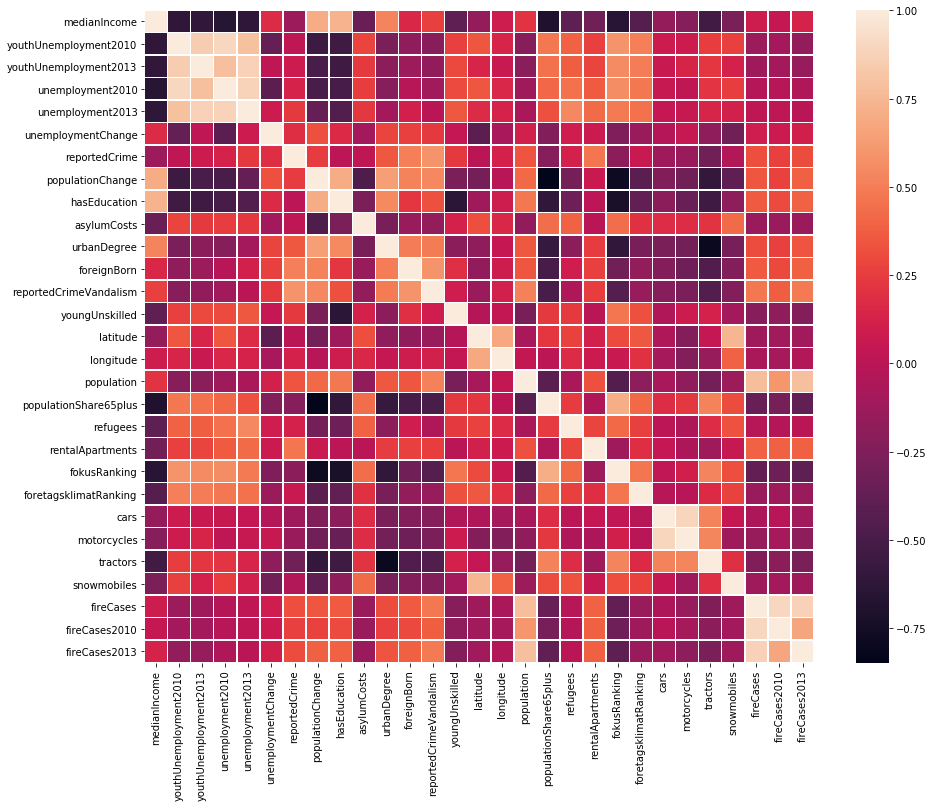

In [20]:
indicators_features_list = indicators.columns
cor_mat = indicators.loc[:, indicators_features_list].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

We need to get indicator (dummy) variables for all categorical columns.

In [21]:
indicators_dummies = pd.get_dummies(indicators)